In [9]:
import pennylane.numpy as np
import matplotlib.pyplot as plt
from qml_essentials.model import Model
from qml_essentials.coefficients import Coefficients

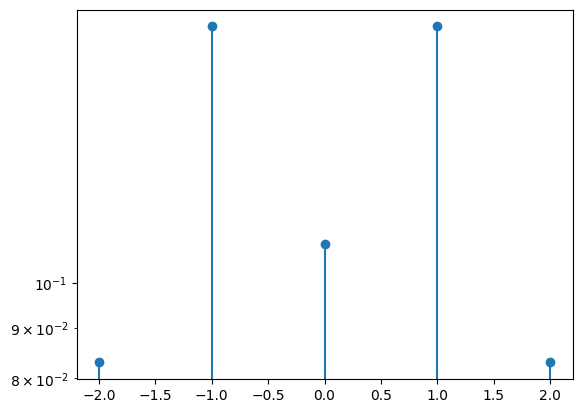

In [10]:
model = Model(
    n_qubits=2,
    n_layers=1,
    circuit_type="Circuit_19",
)

rng = np.random.default_rng(1000)
all_coeffs = []
for _ in range(100):
    model.initialize_params(rng)
    all_coeffs.append(Coefficients.sample_coefficients(model, shift=True))

freqs = Coefficients.get_frequencies(all_coeffs[0], shift=True)

all_coeffs = np.mean(np.abs(all_coeffs), axis=0)

fig, ax = plt.subplots()
ax.stem(freqs, all_coeffs)
plt.yscale("log")
plt.show()

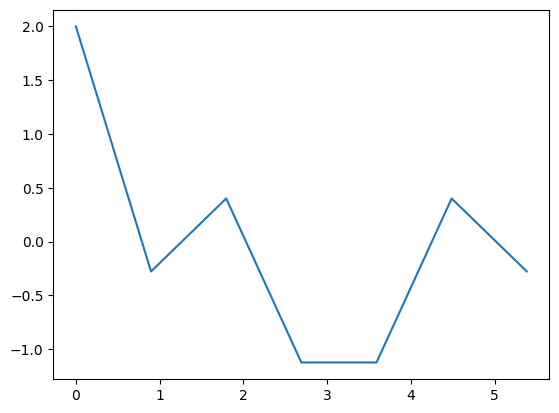

In [11]:
class Model_Fct:
    def __init__(self, c, f):
        self.c = c
        self.f = f
        self.degree = max(f)

    def __call__(self, inputs, **kwargs):
        return np.sum([c * np.cos(inputs * f) for f, c in zip(self.f, self.c)], axis=0)

freqs = [1,3]
coeffs = [1,1]

fs = max(freqs) * 2 + 1
model_fct = Model_Fct(coeffs,freqs)

x = np.arange(0,2 * np.pi, 2 * np.pi/fs)

out = model_fct(x)

fig, ax = plt.subplots()
ax.plot(x, out)


<StemContainer object of 3 artists>

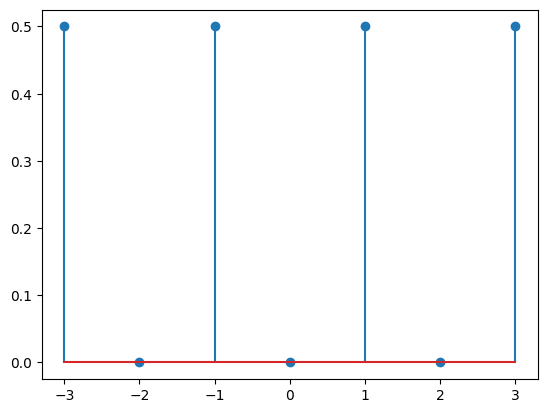

In [12]:
X = np.fft.fft(out)
X_shift = np.fft.fftshift(X)
X_freq = np.fft.fftfreq(X.size, 1/fs)
X_freq_shift = np.fft.fftshift(X_freq)

fig, ax = plt.subplots()
ax.stem(X_freq_shift, np.abs(X_shift)/X_shift.size)

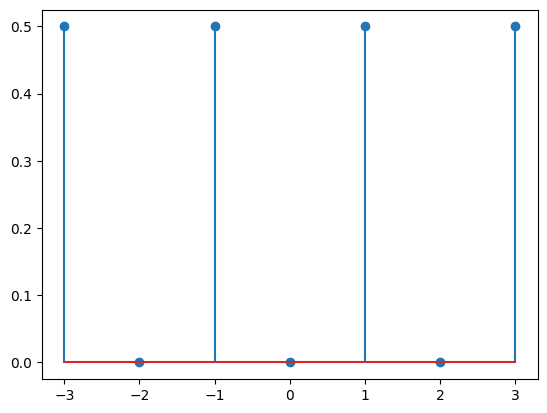

In [13]:
from pennylane.fourier import coefficients as pcoefficients

coeffs = np.fft.fftshift(pcoefficients(model_fct, 1, int(max(freqs))))

freqs = np.fft.fftshift(Coefficients.get_frequencies(coeffs))

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(coeffs))
plt.show()

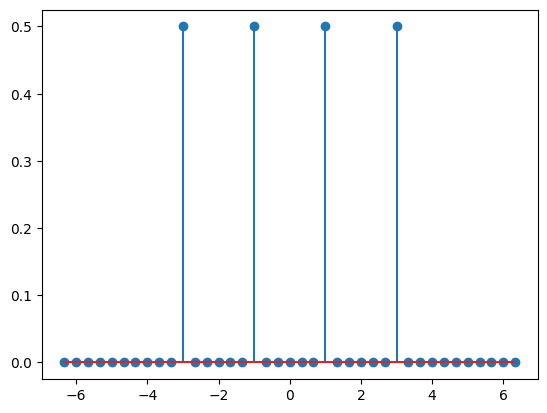

In [17]:
coeffs = Coefficients.sample_coefficients(model_fct, mfs=2, mts=3, shift=True)

freqs = Coefficients.get_frequencies(coeffs, shift=True, mts=3)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(coeffs))
plt.show()